In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
df = pd.read_csv("../data/Reviews.csv").set_index("Id")
df = df.sample(n=10000)

In [16]:
df["Helpfulness"] = df.HelpfulnessNumerator / df.HelpfulnessDenominator
df.Helpfulness.fillna(-1, inplace=True)
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness
Id,,,,,,,,,,
14809,B001I8BNMC,A2VMLZI6N4HAKK,NevadaGramma,1,2,5,1319414400,What a surprise...,"Due to ""budget cuts"" we decided no more Diedri...",0.500000
511887,B001HTGAUM,A1AFOZHYYYYYH0,Brother Maynard,0,0,3,1344384000,I Eat Three Every Day to Help Keep Me Strong,Great product off the shelf - healthy and tast...,-1.000000
254025,B000JZ3576,A15UPJF4RHJE4H,amandab,1,1,4,1334188800,Perfect except there was no green apple!,"I love airheads, and there's not much that can...",1.000000
540353,B0005YKSGC,A3JV071KO43Q5X,"Jeff Pittman ""Jeff""",0,0,5,1289433600,Accept no substitute!,"Out of the clear blue, I recently got a yearni...",-1.000000
390421,B0012HEVQE,A1R6PBUJB8LBGC,"Stretch ""Stretch""",4,7,1,1266451200,Why more BPA?,Muir Glen cans are lined in plastic and leach ...,0.571429


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14809 to 81121
Data columns (total 10 columns):
ProductId                 10000 non-null object
UserId                    10000 non-null object
ProfileName               9999 non-null object
HelpfulnessNumerator      10000 non-null int64
HelpfulnessDenominator    10000 non-null int64
Score                     10000 non-null int64
Time                      10000 non-null int64
Summary                   10000 non-null object
Text                      10000 non-null object
Helpfulness               10000 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 859.4+ KB


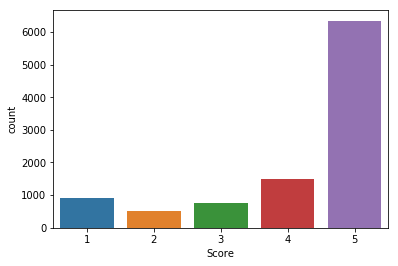

In [18]:
sns.countplot(df['Score'])

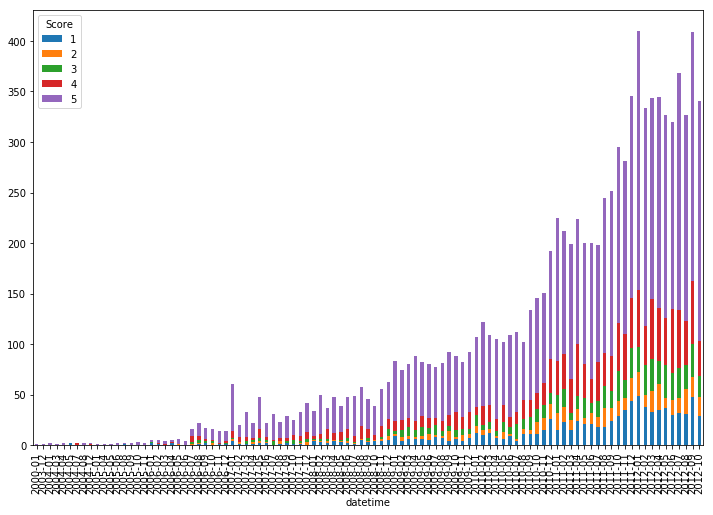

In [20]:
df['datetime'] = pd.to_datetime(df["Time"], unit='s')
df_grp = df.groupby([df.datetime.dt.to_period("M"), df.Score]).count()["ProductId"].unstack()

df_grp.plot(kind="bar", figsize=(12,8), stacked=True)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

In [22]:
vectorizer = TfidfVectorizer(max_df=.8)
enc = OneHotEncoder()

In [60]:
scores = df.Score.values[:, np.newaxis]

In [24]:
vectorizer.fit(df.Text)
enc.fit(scores)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [25]:
X = vectorizer.transform(df.Text).toarray()
Y = enc.transform(scores).toarray()

In [74]:
Y = scores

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

In [77]:
X_train.shape, y_train.shape

((8000, 20244), (8000, 1))

In [78]:
from sklearn.naive_bayes import GaussianNB

In [109]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
clf = GaussianNB()
clf.fit(X_train, y_train)

/Users/joak/.local/share/virtualenvs/finefood-ka5fkx7t/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [80]:
predictions = clf.predict(X_test)

In [106]:
predictions = clf.predict(X_test) 
probas = clf.predict_proba(X_test)

In [108]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.14      0.12      0.13       184
          2       0.06      0.13      0.08       102
          3       0.08      0.11      0.10       160
          4       0.16      0.21      0.18       252
          5       0.64      0.53      0.58      1302

avg / total       0.46      0.40      0.43      2000



In [110]:
confusion_matrix(y_test, predictions)

array([[ 22,  19,  17,  21, 105],
       [  9,  13,   9,  13,  58],
       [ 19,  15,  18,  18,  90],
       [ 17,  25,  21,  52, 137],
       [ 93, 137, 153, 223, 696]])

In [113]:
y_train.shape

(8000, 1)